# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


In [2]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [3]:
ds.describe()

,Unnamed: 0,id_realEstates,phone_realEstate,rooms,bathrooms,surface,price,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,zipCode,customZone
count,15335.000000,1.533500e+04,1.454100e+04,14982.000000,14990.000000,14085.000000,1.533500e+04,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.000000,0.0,0.0
mean,7668.000000,1.524371e+08,9.143423e+08,3.231611,2.150233,196.916436,4.773036e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166873,NaN,NaN
std,4426.977524,2.277286e+06,7.516036e+06,1.393106,1.292079,2182.758313,5.912942e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372875,NaN,NaN
min,1.000000,1.221584e+08,8.762742e+08,1.000000,1.000000,15.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
25%,3834.500000,1.519456e+08,9.113649e+08,2.000000,1.000000,80.000000,1.690000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
50%,7668.000000,1.532413e+08,9.121841e+08,3.000000,2.000000,114.000000,2.800000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
75%,11501.500000,1.538105e+08,9.148904e+08,4.000000,3.000000,205.000000,5.400000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
max,15335.000000,1.540033e+08,9.887761e+08,30.000000,20.000000,249000.000000,8.500000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [4]:
most_expensive = ds.sort_values(by="price", ascending=False).iloc[0]["address"]
most_expensive_price = ds.sort_values(by="price", ascending=False).iloc[0]["price"]

print(f'The house with address in {most_expensive} is the most expensive and its price is {most_expensive_price} USD')

The house with address in El Escorial is the most expensive and its price is 8500000 USD


#### Exercise 02. Which is cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [5]:
most_cheapest = ds.sort_values(by="price").iloc[0]["address"]
most_cheapest_price = ds.sort_values(by="price").iloc[0]["price"]

print(f'The house with address in {most_cheapest} is the most cheapest and its price is {most_cheapest_price} USD')

The house with address in Paseo del Licenciado Vidriera, Getafe is the most cheapest and its price is 0 USD


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [7]:
biggest_house = ds.sort_values(by="surface", ascending=False).iloc[0]["address"]

biggest_area = ds.sort_values(by="surface", ascending=False).iloc[0]["surface"]

smallest_house = ds.sort_values(by="surface").iloc[0]["address"]

smallest_area = ds.sort_values(by="surface").iloc[0]["surface"]

print(f'The bigger house is located on {biggest_house} and its surface is {biggest_area} meters\n')
print(f'The smallest house is located on {smallest_house} and its surface is {smallest_area} meters')

The bigger house is located on Sevilla la Nueva and its surface is 249000.0 meters

The smallest house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the name of the populations with comma as separator. For example:

`> print(populations)`

`population1, population2, population3,...`

In [8]:
group_populations = ds.groupby('level5').size()

# Imprime la cantidad de poblaciones
print(f"How many populations (level5 column) the dataset contains? {len(group_populations)}")

# Imprime los nombres de las poblaciones separados por comas
populations = ', '.join(group_populations.index)
print(f"Populations: {populations}")

How many populations (level5 column) the dataset contains? 168
Populations:  Madrid Capital, Ajalvir, Alcalá de Henares, Alcobendas, Alcorcón, Aldea del Fresno, Algete, Alpedrete, Ambite, Anchuelo, Aranjuez, Arganda del Rey, Arroyomolinos (Madrid), Batres, Becerril de la Sierra, Belmonte de Tajo, Boadilla del Monte, Braojos, Brea de Tajo, Brunete, Buitrago del Lozoya, Bustarviejo, Cabanillas de la Sierra, Cadalso de los Vidrios, Camarma de Esteruelas, Campo Real, Canencia, Carabaña, Casarrubuelos, Cenicientos, Cercedilla, Chapinería, Chinchón, Ciempozuelos, Cobeña, Collado Mediano, Collado Villalba, Colmenar Viejo, Colmenar de Oreja, Colmenar del Arroyo, Colmenarejo, Corpa, Coslada, Cubas de la Sagra, Daganzo de Arriba, El Atazar, El Berrueco, El Boalo - Cerceda – Mataelpino, El Escorial, El Molar (Madrid), El Vellón, El Álamo, Estremera, Fresnedillas de la Oliva, Fresno de Torote, Fresno de Torote - Serracines, Fuenlabrada, Fuente El Saz de Jarama, Fuentidueña de Tajo, Galapagar, Garg

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`true` or `fase`) followed by the rows/cols that contains NAs.

In [9]:
has_nas = ds.isna().values.any()

# Print the boolean value
print(f"Are there any missing values (NAs)? {has_nas}")

if has_nas:
    print("Rows with NAs:")
    print(ds[ds.isna().any(axis=1)])

    print("\nColumns with NAs:")
    print(ds.columns[ds.isna().any()].tolist())

Are there any missing values (NAs)? True
Rows with NAs:
       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions

In [10]:
ds_clean = ds.dropna(axis='columns')
ds_new = ds_clean.dropna()

# Compara las dimensiones
original_rows, original_columns = ds.shape
cleaned_rows, cleaned_columns = ds_new.shape

print(f"Original DataFrame dimensions: {original_rows} rows, {original_columns} columns\n")
print(f"Cleaned DataFrame dimensions: {cleaned_rows} rows, {cleaned_columns} columns]\n")

Original DataFrame dimensions: 15335 rows, 37 columns

Cleaned DataFrame dimensions: 15335 rows, 25 columns]



#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value

In [39]:
arroyomolinos_prices = ds[ds['level5'] == 'Arroyomolinos (Madrid)']['price']
mean_price_arroyomolinos = arroyomolinos_prices.mean()

print(f"The mean price in Arroyomolinos (Madrid) is: {mean_price_arroyomolinos:.2f} USD")

The mean price in Arroyomolinos (Madrid) is: 294541.60 USD


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

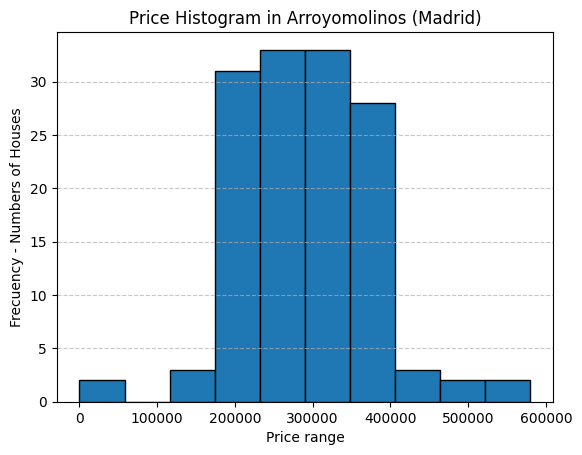

In [12]:
import matplotlib.pyplot as plt

# histograma
  
plt.hist(arroyomolinos_prices, bins = 10, edgecolor = 'black')
plt.xlabel('Price range')
plt.ylabel('Frecuency - Numbers of Houses')
plt.title('Price Histogram in Arroyomolinos (Madrid)')
plt.grid(axis= 'y', linestyle = '--', alpha = 0.7)

# Mostrar la gráfica
plt.show()

La mayoria de los precios de las casas en Arroyomolinos se encuentra entre 200.000 y 400.000

#### Exercise 09. Is the average of "Valdemorillo" and "Galapagar" prices the same? (★★☆)

Print the both average prices and then write a conclusion about them

In [37]:
# Filtrar las filas para Valdemorillo y Galapagar
valdemorillo_prices = ds.loc[ds['level5'] == 'Valdemorillo', 'price']
galapagar_prices = ds.loc[ds['level5'] == 'Galapagar', 'price']

# Calcular los promedios
avg_valdemorillo = valdemorillo_prices.mean()
avg_galapagar = galapagar_prices.mean()

print(f"Precio promedio en Valdemorillo: {avg_valdemorillo:.2f} USD")
print(f"Precio promedio en Galapagar: {avg_galapagar:.2f} USD")

# Comparar los valores
if avg_valdemorillo == avg_galapagar:
    print("El precio promedio es el mismo en ambas localidades.")
else:
    print("Los precios promedio son diferentes en Valdemorillo y Galapagar.")

Precio promedio en Valdemorillo: 363860.29 USD
Precio promedio en Galapagar: 360063.20 USD
Los precios promedio son diferentes en Valdemorillo y Galapagar.


#### Exercise 10. Is the average of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same? (★★☆)

Print the both average prices and then write a conclusion about

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [36]:
# Crear la columna pps (precio por metro cuadrado)
ds['pps'] = ds['price'] / ds['surface']

# Calcular los promedios por metro cuadrado
avg_pps_valdemorillo = ds.loc[ds['level5'] == 'Valdemorillo', 'pps'].mean()
avg_pps_galapagar = ds.loc[ds['level5'] == 'Galapagar', 'pps'].mean()

print(f"Precio promedio por metro cuadrado en Valdemorillo: {avg_pps_valdemorillo:.2f} USD/m^2")
print(f"Precio promedio por metro cuadrado en Galapagar: {avg_pps_galapagar:.2f} USD/m^2")

# Comparar los valores
if avg_pps_valdemorillo == avg_pps_galapagar:
    print("El precio promedio por metro cuadrado es el mismo en ambas localidades.")
else:
    print("Los precios promedio por metro cuadrado son diferentes en Valdemorillo y Galapagar.")

Precio promedio por metro cuadrado en Valdemorillo: 1317.95 USD/m^2
Precio promedio por metro cuadrado en Galapagar: 1606.32 USD/m^2
Los precios promedio por metro cuadrado son diferentes en Valdemorillo y Galapagar.


#### Exercise 11. Analyse the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot` and then write a conclusion about it

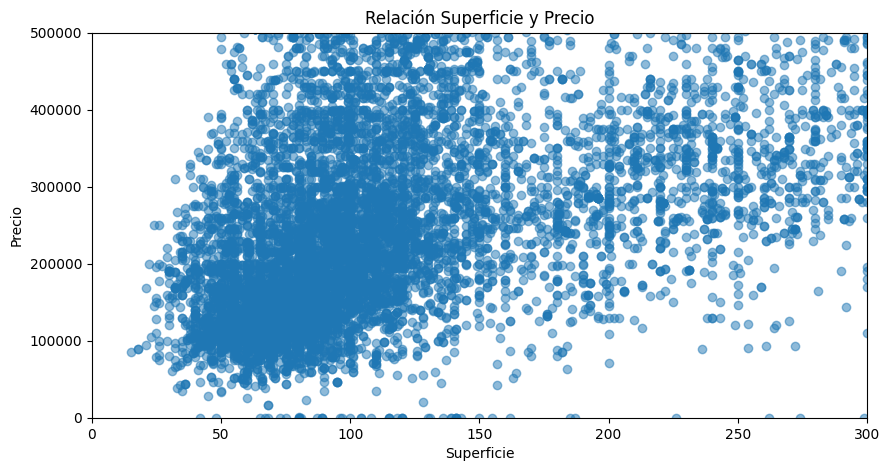

In [30]:
import matplotlib.pyplot as plt

# Filtrar valores atípicos (superficies mayores a 50000 m2)
filtered_data = ds[ds['surface'] < 5000]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 5))
plt.scatter(filtered_data['surface'], filtered_data['price'], alpha = 0.5)
plt.title('Relación Superficie y Precio')
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.xlim(0,300)
plt.ylim(0,500000)
plt.show()

Se observa un gran número de viviendas entre 50 y 100 metros cuadrados con un valor entre 100K y 200K.

#### Exercise 12. How many real estate agencies the dataset contains? (★★☆)

Print the obtained value

In [32]:
# total agencies, without counting repetitions
agencies = ds['realEstate_name'].value_counts()
num_agencies = agencies.nunique()
print(f"Total:  {num_agencies} agencias.")

Total:  78 agencias.


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses

In [52]:
# Encontrar la población con más casas

houses_by_population = ds.groupby('level5')['realEstate_name'].count()
population_more_houses = houses_by_population.idxmax()
sum_population_more_houses = houses_by_population.max()
print(f"{population_more_houses} es la mas poblada con {sum_population_more_houses} casas")

 Madrid Capital es la mas poblada con 6639 casas


#### Exercise 14. Now let's work with the "south belt" of madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`

In [53]:
# Create a subset of the DataFrame
south_belt_ds = ds[ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])]

# Print the resulting DataFrame
print(south_belt_ds)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot

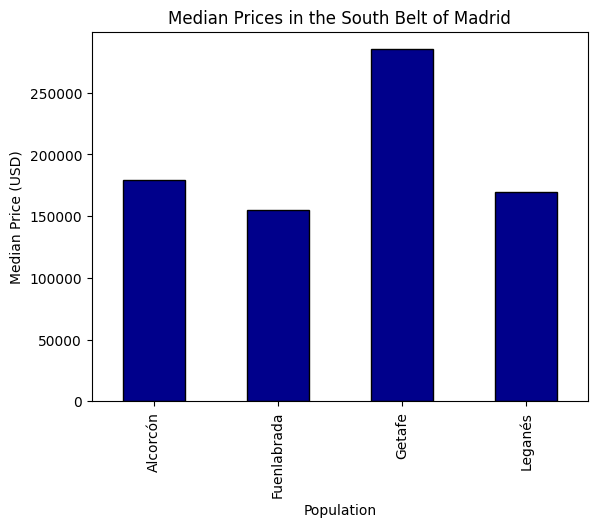

In [79]:
# Calcular la mediana en precios para cada poblacion

median_prices = south_belt_ds.groupby('level5')['price'].median()

# Create a bar plot
median_prices.plot(kind='bar', color='darkblue', edgecolor='black')
plt.title('Median Prices in the South Belt of Madrid')
plt.xlabel('Population')
plt.ylabel('Median Price (USD)')

# Show the plot
plt.show()

Los precios mas altos se encuentran en Getafe

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14) (★★★)

Print both values for each variable

In [60]:
# Calculate the sample mean for each variable
mean_price = south_belt_ds['price'].mean()
mean_rooms = south_belt_ds['rooms'].mean()
mean_surface_area = south_belt_ds['surface'].mean()
mean_bathrooms = south_belt_ds['bathrooms'].mean()

# Calculate the sample variance for each variable
var_price = south_belt_ds['price'].var()
var_rooms = south_belt_ds['rooms'].var()
var_surface_area = south_belt_ds['surface'].var()
var_bathrooms = south_belt_ds['bathrooms'].var()

print(f"Promedio (Precio): {mean_price:.2f}")
print(f"Promedio (Habitaciones): {mean_rooms:.2f}")
print(f"Promedio (Area): {mean_surface_area:.2f}")
print(f"Promedio (Baños): {mean_bathrooms:.2f}\n")

print(f"Varianza (Precio): {var_price:.2f}")
print(f"Varianza (Habitaciones): {var_rooms:.2f}")
print(f"Varianzae (Area): {var_surface_area:.2f}")
print(f"Varianza (Baños): {var_bathrooms:.2f}")

Promedio (Precio): 223094.48
Promedio (Habitaciones): 3.02
Promedio (Area): 111.75
Promedio (Baños): 1.63

Varianza (Precio): 14921367508.05
Varianza (Habitaciones): 0.72
Varianzae (Area): 4263.05
Varianza (Baños): 0.57


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [61]:
# Agrupar por población y encontrar la casa más costosa en cada grupo
most_expensive_house = south_belt_ds.groupby('level5').apply(lambda x: x.loc[x['price'].idxmax()])

# Mostrar la dirección y el precio de la casa más costosa en cada población
for index, row in most_expensive_house.iterrows():
    print(f"Población: {index}")
    print(f"Dirección: {row['address']}")
    print(f"Precio: ${row['price']}\n")

Población: Alcorcón
Dirección: Alcorcón
Precio: $950000

Población: Fuenlabrada
Dirección: Calle de Paulo Freire, 5, Fuenlabrada
Precio: $490000

Población: Getafe
Dirección: Getafe
Precio: $1050000

Población: Leganés
Dirección: Avenida Reina Sofía, Leganés
Precio: $650000



#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

/tmp/ipykernel_697/1907903520.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_ds['Normalized_Price'] = scaler.fit_transform(south_belt_ds[['price']])


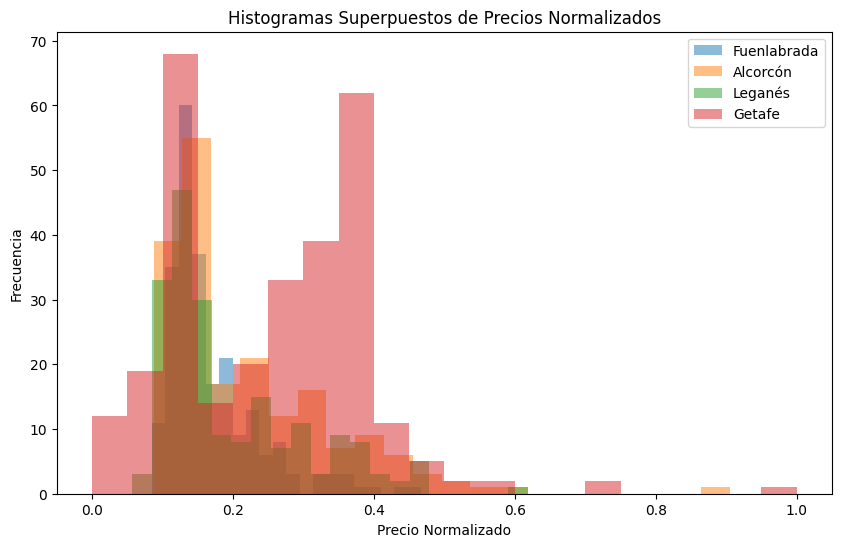

In [71]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar la columna de precios
south_belt_ds['Normalized_Price'] = scaler.fit_transform(south_belt_ds[['price']])

# Crear un solo histograma superpuesto para todas las poblaciones
plt.figure(figsize=(10, 6))
for population in south_belt_ds['level5'].unique():
    data = south_belt_ds[south_belt_ds['level5'] == population]['Normalized_Price']
    plt.hist(data, bins=20, alpha=0.5, label=population)

plt.title('Histogramas Superpuestos de Precios Normalizados')
plt.xlabel('Precio Normalizado')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# # Crear subplots para los 4 histogramas
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# # Histograma para cada población
# for i, population in enumerate(south_belt_ds['level5'].unique()):
#     data = south_belt_ds[south_belt_ds['level5'] == population]['Normalized_Price']
#     axes.flat[i].hist(data, bins=20, alpha=0.7, label=population)
#     axes.flat[i].set_title(f'Histograma ({population})')
#     axes.flat[i].set_xlabel('Precio Normalizado')
#     axes.flat[i].set_ylabel('Frecuencia')
#     axes.flat[i].legend()

# plt.tight_layout()
# plt.show()

Getafe presenta precios mas altos en comparacion a las otras poblaciones

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [73]:
# Calculate price per square meter (pps)
south_belt_ds['pps'] = south_belt_ds['price'] / south_belt_ds['surface']

# Calculate average pps for Getafe and Alcorcón
pps_getafe = south_belt_ds[south_belt_ds['level5'] == 'Getafe']['pps'].mean()
pps_alcorcon = south_belt_ds[south_belt_ds['level5'] == 'Alcorcón']['pps'].mean()

# Compare the values
if pps_getafe > pps_alcorcon:
    comparison = "higher"
else:
    comparison = "lower"

f"**The average price per square meter (pps) in Getafe is {pps_getafe:.2f}, which is {comparison} than in Alcorcón ({pps_alcorcon:.2f}).**"

/tmp/ipykernel_697/1071241492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_ds['pps'] = south_belt_ds['price'] / south_belt_ds['surface']


'**The average price per square meter (pps) in Getafe is 2066.31, which is lower than in Alcorcón (2239.30).**'

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

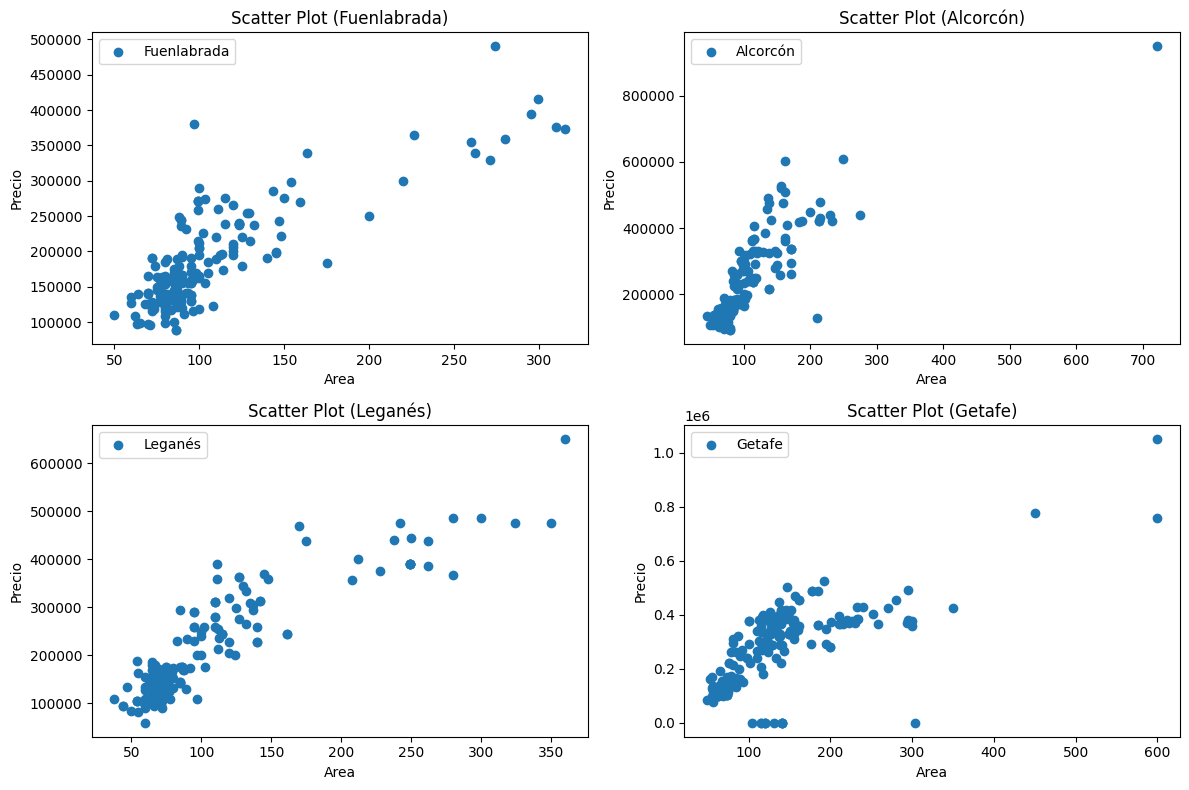

In [76]:
# Create subplots for the 4 populations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Scatter plot for each population
for i, population in enumerate(south_belt_ds['level5'].unique()):
    data = south_belt_ds[south_belt_ds['level5'] == population]
    axes.flat[i].scatter(data['surface'], data['price'], label=population)
    axes.flat[i].set_title(f'Scatter Plot ({population})')
    axes.flat[i].set_xlabel('Area')
    axes.flat[i].set_ylabel('Precio')
    axes.flat[i].legend()

plt.tight_layout()
plt.show()

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in the question 14) (★★★★)

Execute the following cell and then start coding in the next one. You must implement a simple code that transform the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [152]:
from ipyleaflet import Map, basemaps, CircleMarker

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude

# Cambia "Stamen.Terrain" por "OpenStreetMap.Mapnik"

map = Map(center = (40.35, -3.7), zoom = 10, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.35, -3.7], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [153]:
## HERE: plot the coordinates of the estates

cities = [
    {"Name": "Fuenlabrada", "Latitude": 40.28, "Longitude": -3.79},
    {"Name": "Leganés", "Latitude": 40.32, "Longitude": -3.77},
    {"Name": "Getafe", "Latitude": 40.31, "Longitude": -3.73},
    {"Name": "Alcorcón", "Latitude": 40.35, "Longitude": -3.82}
]

## PUT HERE YOUR CODE:

# Lista de colores personalizados
colors = {
    'Fuenlabrada': 'blue',
    'Leganés': 'yellow',
    'Getafe': 'green',
    'Alcorcón': 'red'
}

# Agregar marcadores al mapa para cada ciudad
for city in cities:
    name = city['Name']
    latitude = city['Latitude']
    longitude = city['Longitude']
    
    # Crear un marcador circular para cada ciudad
    marker = CircleMarker(location=(latitude, longitude), radius=5, color=colors.get(name, 'gray'), fill=True, fill_color=colors.get(name, 'gray'))
    
    # Agregar el marcador al mapa
    map.add_layer(marker)

# Mostrar el mapa
map

Map(bottom=99109.0, center=[40.35, -3.7], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_…